In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
gCredit=pd.read_csv("german_credit.csv")
gCredit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [3]:
gCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

gCredit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [69]:
from sklearn.model_selection import train_test_split
X=gCredit
y=gCredit['purpose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [ ]:
# Lets build a Ensemble model but need to modify the dataset first
#print(X_train, X_test)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [91]:
gCredit_dummies = pd.get_dummies(gCredit, columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])
#gCredit_dummies = pd.get_dummies(gCredit,gCredit[gCredit.columns[0:21]])
gCredit_dummies

#'account_check_status','credit_history','purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,4,31,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
996,0,30,3857,4,4,40,1,1,0,1,...,1,0,1,0,0,0,0,1,0,1
997,0,12,804,4,4,38,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
998,1,45,1845,4,4,23,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1


In [92]:
gCredit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [88]:
#sns.pairplot(gCredit_dummies, diag_kind='kde')

gCredit_dummies.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,foreign_worker_no,foreign_worker_yes
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908,0.119061,0.266244,...,-0.098639,0.059045,0.104953,-0.132951,0.074202,0.004475,-0.083858,0.095812,-0.071374,0.071374
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,...,-0.245338,0.217272,0.014235,-0.049515,0.071134,0.194154,-0.038749,-0.118875,-0.127211,0.127211
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,...,-0.269928,0.262210,0.047435,-0.078692,0.069622,0.238881,-0.109663,-0.072627,-0.062949,0.062949
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,...,-0.008171,0.053351,-0.025082,0.023710,-0.002092,0.017641,0.029932,-0.050538,-0.039202,0.039202
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,...,-0.091232,0.211310,0.016316,0.028583,-0.084003,0.228775,-0.256385,0.110245,-0.087317,0.087317
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,...,0.013776,0.207654,0.015605,-0.011243,-0.005505,0.256559,-0.027520,-0.185217,-0.027273,0.027273
credits_this_bank,-0.047948,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,...,0.055421,-0.068965,0.051410,-0.033898,-0.024226,-0.054391,0.050856,-0.014214,-0.017713,0.017713
people_under_maintenance,0.005908,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,...,0.018055,0.117003,0.067123,-0.091891,0.060766,0.145140,-0.091633,-0.014426,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.119061,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,...,-0.002058,0.031891,0.027672,-0.007411,-0.034058,-0.006935,-0.018287,0.027613,-0.051992,0.051992
account_check_status_< 0 DM,0.266244,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,...,-0.054211,0.049693,0.050657,-0.059039,0.025861,0.073800,-0.109210,0.067046,0.010024,-0.010024


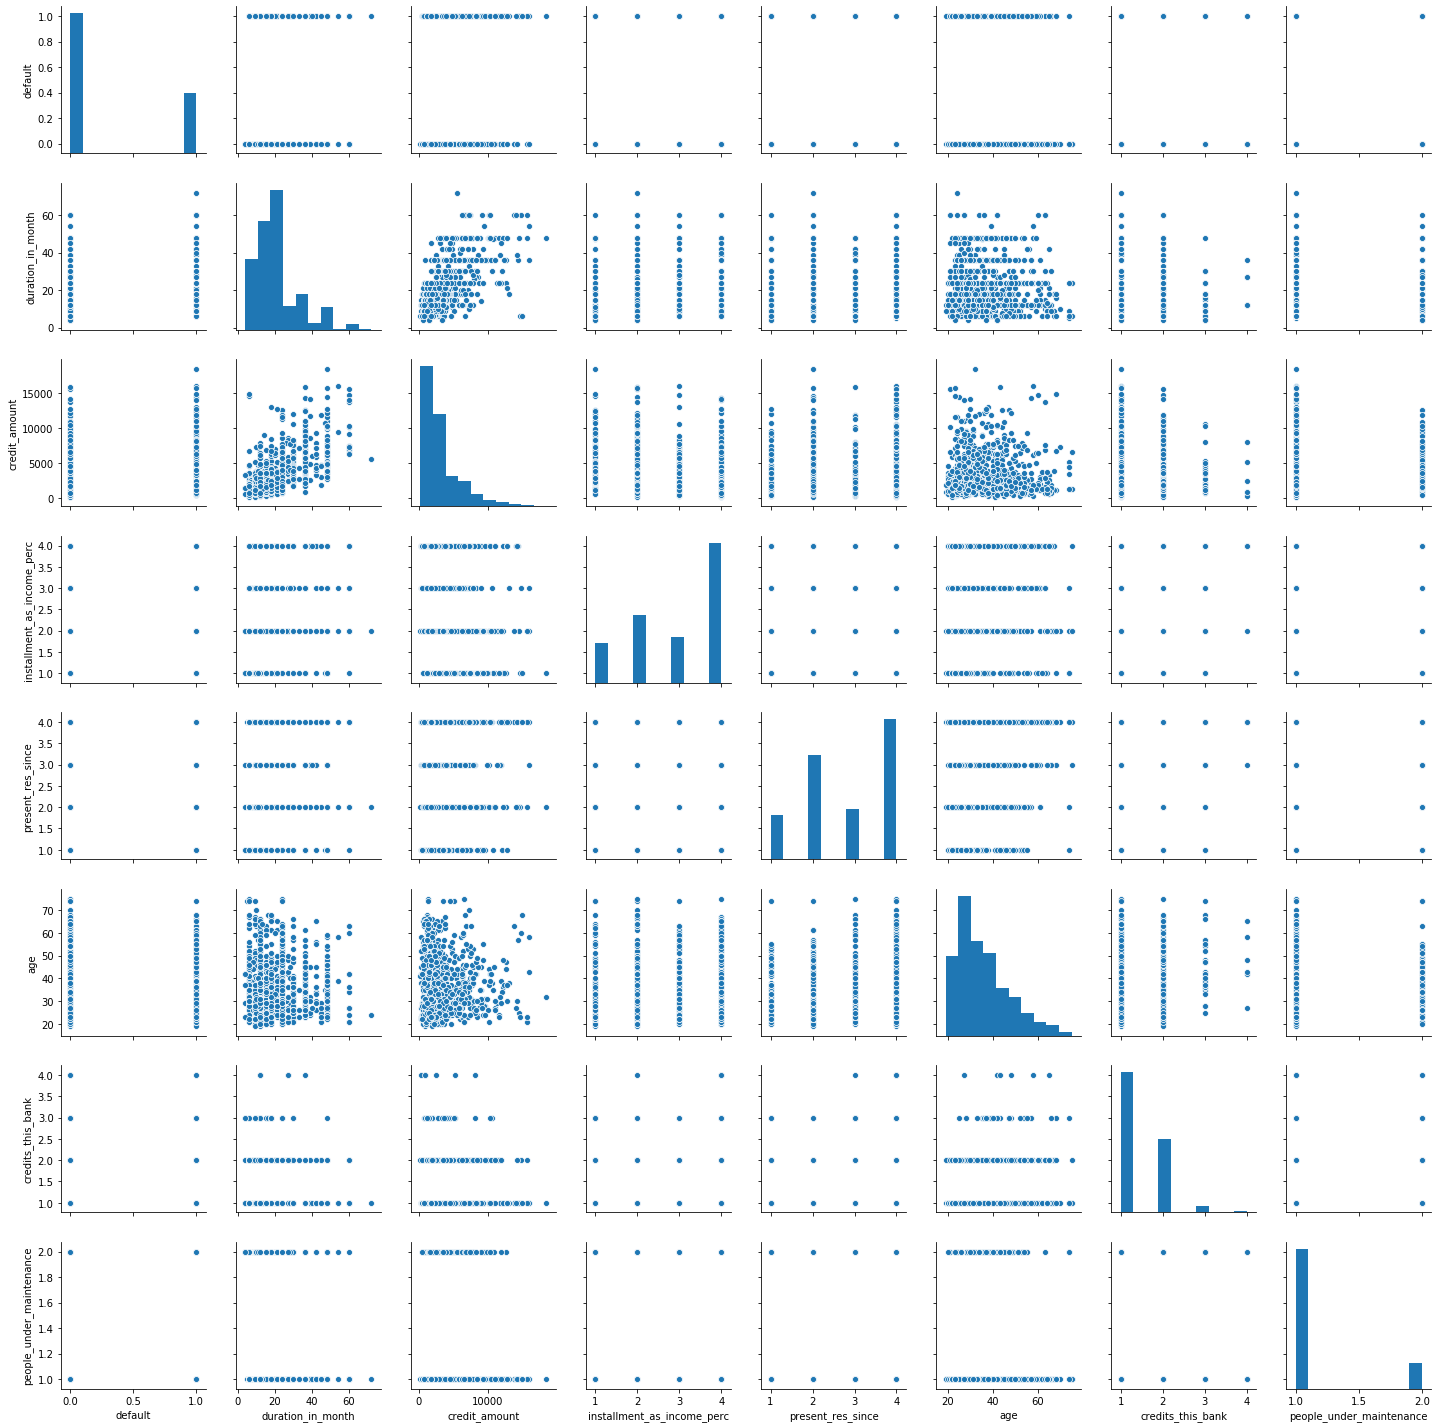

In [89]:
sns.pairplot(gCredit)


In [94]:
from scipy.stats import zscore

gCredit_dummies = gCredit_dummies.apply(zscore)
gCredit_dummies

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,-0.654654,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-0.606621,1.627770,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,-1.214598,1.214598,-0.196014,0.196014
1,1.527525,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,1.648476,-0.614337,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
2,-0.654654,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.606621,-0.614337,...,0.634448,-0.466933,-0.416784,-1.304877,-0.149983,2.0,0.823318,-0.823318,-0.196014,0.196014
3,-0.654654,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.606621,1.627770,...,-1.576173,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
4,1.527525,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.606621,1.627770,...,-1.576173,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.654654,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,-0.606621,-0.614337,...,0.634448,-0.466933,-0.416784,-1.304877,-0.149983,2.0,0.823318,-0.823318,-0.196014,0.196014
996,-0.654654,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,-0.606621,1.627770,...,0.634448,-0.466933,2.399324,-1.304877,-0.149983,-0.5,-1.214598,1.214598,-0.196014,0.196014
997,-0.654654,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,-0.606621,-0.614337,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014
998,1.527525,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,-0.606621,1.627770,...,-1.576173,-0.466933,-0.416784,0.766356,-0.149983,-0.5,-1.214598,1.214598,-0.196014,0.196014


### Drop the original variables which are converted to dummy

In [ ]:
df=gCredit_dummies.drop(['personal_status_sex_male : single','personal_status_sex_male : married/widowed','personal_status_sex_male : divorced/separated','personal_status_sex_female : divorced/separated/married','telephone_none'], axis=1)
df.describe()

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df
y=df['purpose_business']

X_scaled= StandardScaler().fit_transform(X)

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
model.fit(X_scaled_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_scaled_train)
accuracy_score(y_train, predictions)

#model.score(X_test,y_test)

### Q6 Show the list of the features importance( 1 Marks)

In [ ]:
#List of feature importance, already dropped the columns which had not impacted the data for credit risk
df

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Use below values
#num_folds = 10
#seed = 77
kf = KFold(77, True)

In [62]:
#Validate the Random Forest model build above using k fold

In [63]:
#Calculate Mean score

In [64]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

In [65]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
model.fit(X_scaled_train, y_train)
predicted = model.predict(X_test)
print("\n***Confusion matrix***\n",confusion_matrix(y_test,predicted))

ValueError: Unknown label type: 'continuous-multioutput'

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [ ]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())